In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [88]:
#nombre de modalités de chaque variables (dans un dataframe)
def nombre_mod(data2):
    #création d'un dataframe vide
    dff= pd.DataFrame(columns=["VARIABLE","NOMBRE_MOD", "NOMBRE_MOD_SANS_NA"])
    for i in range(data2.shape[1]): # sans compter les valeurs manquantes
        taille =len(data2.iloc[:,i].value_counts(dropna=False))
        taille_1 = len(data2.iloc[:,i].value_counts(dropna=True) )
        dff=dff.append({"VARIABLE": colonnes[i],"NOMBRE_MOD":taille, "NOMBRE_MOD_SANS_NA":taille_1 }, ignore_index=True)
    return dff


# sélection des corrélations les plus importantes
def variables_corr(tableau_corr, seuil):
    colonnes = tableau_corr.columns
    variables_corr_pos=[] ; variables_corr_pos_val=[]
    variables_corr_neg=[] ; variables_corr_neg_val=[]
    for i in range(tableau_corr.shape[0]):  
        for j in range(tableau_corr.shape[0]):
            if i<j: #i!=j:
                if (tableau_corr.iloc[i,j] > seuil):
                    variables_corr_pos.append(colonnes[j])
                    variables_corr_pos_val.append(round( tableau_corr.iloc[i,j], 2))
                if (tableau_corr.iloc[i,j] <-seuil):
                    variables_corr_neg.append(colonnes[j])
                    variables_corr_neg_val.append(round( tableau_corr.iloc[i,j], 2))

        if (len(variables_corr_pos) > 0) | (len(variables_corr_neg) >0) :
            print("variable : ", colonnes[i])
            if len(variables_corr_pos) > 0:    
                print("corr pos", variables_corr_pos)
                print("corr pos", variables_corr_pos_val)
            if len(variables_corr_neg) >0:  
                print("corr neg", variables_corr_neg)
                print("corr neg", variables_corr_neg_val)
            print("")
        variables_corr_pos = variables_corr_pos*0
        variables_corr_neg = variables_corr_pos*0

        variables_corr_pos_val = variables_corr_pos_val*0
        variables_corr_neg_val = variables_corr_pos_val*0



In [89]:
# les noms des variables

colonnes =(["IDENT", "TypeHabi", "GeoFaz_Scl", "GeoFaz_cl", "ImmoFaz_Scl", "ImmoFaz_cl", "Anciennete",
            "Logement_prix_m2", "Mediane_RFR", "Sexe", "Prenom_Phase_scl_H", "Prenom_Phase_scl_F",
            "Prenom_Phase_cl_H", "Prenom_Phase_cl_F", "Age_H", "Age_F", "Affinite_1", "Affinite_2",
            "Prenom_effectif", "Potentiel_prenom", "Onoma-Phase_Scl", "Onoma-Phase_CL", "Top_mon"])

In [90]:
#data_orig = pd.read_csv("C:/Users/Christian/Desktop/my_data_FDFIFI19.txt",sep=" " , names = colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data_orig = pd.read_csv("/content/drive/MyDrive/spad_score_method_1/spad_projection_FDFTOT21/my_data_FDFTOT21.txt", delim_whitespace="\t", header = None, names=colonnes, low_memory=False, dtype=str )#, dtype='Int64')
data_orig
data = data_orig.copy()
data

,IDENT,TypeHabi,GeoFaz_Scl,GeoFaz_cl,ImmoFaz_Scl,ImmoFaz_cl,Anciennete,Logement_prix_m2,Mediane_RFR,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Affinite_1,Affinite_2,Prenom_effectif,Potentiel_prenom,Onoma-Phase_Scl,Onoma-Phase_CL,Top_mon
0,000000010010000001,02,81,08,91,09,06,21,21,01,71,41,07,04,12,04,20,02,02,01,51,05,1
1,000000020010000006,01,75,07,43,04,06,06,13,02,71,64,07,06,12,09,04,12,04,13,12,01,1
2,000000030010000011,01,76,07,43,04,06,06,16,03,54,81,05,08,07,12,06,06,04,18,36,03,2
3,000000040010000013,03,75,07,43,04,04,06,13,01,71,36,07,03,12,11,11,19,04,06,21,02,1
4,000000050010000015,02,33,03,44,04,06,07,12,01,71,42,07,04,12,05,14,03,03,01,14,01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219994,010928800370109343,01,64,06,82,08,05,16,17,02,71,81,07,08,12,12,21,21,06,21,61,06,NaN
1219995,010928810370109344,03,61,06,64,06,06,14,01,04,44,81,04,08,05,12,01,05,01,03,54,05,NaN
1219996,010928820370109345,02,13,01,42,04,07,07,15,02,71,81,07,08,12,12,21,21,06,21,61,06,NaN
1219997,010928830370109346,02,31,03,82,08,08,16,19,02,71,45,07,04,12,03,02,02,03,01,44,04,NaN


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219999 entries, 0 to 1219998
Data columns (total 23 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   IDENT               1219999 non-null  object
 1   TypeHabi            1219999 non-null  object
 2   GeoFaz_Scl          1219999 non-null  object
 3   GeoFaz_cl           1219999 non-null  object
 4   ImmoFaz_Scl         1219999 non-null  object
 5   ImmoFaz_cl          1219999 non-null  object
 6   Anciennete          1219999 non-null  object
 7   Logement_prix_m2    1219999 non-null  object
 8   Mediane_RFR         1219999 non-null  object
 9   Sexe                1219999 non-null  object
 10  Prenom_Phase_scl_H  1219999 non-null  object
 11  Prenom_Phase_scl_F  1219999 non-null  object
 12  Prenom_Phase_cl_H   1219999 non-null  object
 13  Prenom_Phase_cl_F   1219999 non-null  object
 14  Age_H               1219999 non-null  object
 15  Age_F               1219999 non-

In [92]:
(data.isnull()).sum(axis=0)

IDENT                       0
TypeHabi                    0
GeoFaz_Scl                  0
GeoFaz_cl                   0
ImmoFaz_Scl                 0
ImmoFaz_cl                  0
Anciennete                  0
Logement_prix_m2            0
Mediane_RFR                 0
Sexe                        0
Prenom_Phase_scl_H          0
Prenom_Phase_scl_F          0
Prenom_Phase_cl_H           0
Prenom_Phase_cl_F           0
Age_H                       0
Age_F                       0
Affinite_1                  0
Affinite_2                  0
Prenom_effectif             0
Potentiel_prenom            0
Onoma-Phase_Scl             0
Onoma-Phase_CL              0
Top_mon               1092884
dtype: int64

In [93]:
for k in range(1,data.shape[1]):
    print(data.iloc[:,k].value_counts(dropna=False)); print("="*50)

02    805993
01    276907
03    136404
04       695
Name: TypeHabi, dtype: int64
31    101566
72     97016
13     69466
75     67308
74     64504
34     63938
37     60249
73     56625
43     55284
76     54319
32     53425
11     52210
71     51406
63     48545
36     36645
64     30811
12     30154
35     29127
25     28346
33     26669
41     19584
14     18232
61     15411
62     11137
15     10788
46      8921
21      8240
22      8102
42      8060
24      7055
45      6235
23      5735
44      4396
51      3721
81      3237
52      2720
53       630
54       182
Name: GeoFaz_Scl, dtype: int64
07    391178
03    371619
01    180850
06    105904
04    102480
02     57478
05      7253
08      3237
Name: GeoFaz_cl, dtype: int64
42    111962
72     95586
44     79494
82     75926
71     62534
75     55261
24     52159
22     51766
83     51616
76     51116
84     50524
51     47844
23     43365
81     40332
32     38694
11     37000
52     32711
41     31400
12     31266
63     28173


In [94]:
# élimination des individus n'ayant pas de valeur pour la varialbe IFI+
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [95]:
# tableau de corrélation 
tableau_corr =data_sans_nan.iloc[:,1:-1].corr()
tableau_corr

,TypeHabi,GeoFaz_Scl,GeoFaz_cl,ImmoFaz_Scl,ImmoFaz_cl,Anciennete,Logement_prix_m2,Mediane_RFR,Sexe,Prenom_Phase_scl_H,Prenom_Phase_scl_F,Prenom_Phase_cl_H,Prenom_Phase_cl_F,Age_H,Age_F,Affinite_1,Affinite_2,Prenom_effectif,Potentiel_prenom,Onoma-Phase_Scl,Onoma-Phase_CL
TypeHabi,1.000000,-0.274047,-0.279657,-0.136684,-0.133691,0.035018,-0.237292,-0.011748,0.080296,-0.052108,0.028394,-0.056335,0.029487,-0.038210,0.026113,-0.018304,-0.002496,0.016295,0.036598,-0.038381,-0.036430
GeoFaz_Scl,-0.274047,1.000000,0.996878,0.239643,0.217503,-0.062335,0.305789,-0.126996,-0.110657,0.076784,-0.049402,0.080584,-0.053181,0.056787,-0.043369,0.020785,0.014933,-0.035208,-0.061240,0.052395,0.048198
GeoFaz_cl,-0.279657,0.996878,1.000000,0.262792,0.241049,-0.061990,0.330643,-0.111414,-0.112653,0.077530,-0.050387,0.081539,-0.054045,0.056721,-0.045328,0.020969,0.012704,-0.035951,-0.061668,0.055906,0.051609
ImmoFaz_Scl,-0.136684,0.239643,0.262792,1.000000,0.998321,-0.067798,0.775556,0.345389,-0.077827,0.045851,-0.026068,0.049407,-0.026221,0.031980,-0.041092,0.007258,-0.024594,-0.023303,-0.026982,0.049823,0.045142
ImmoFaz_cl,-0.133691,0.217503,0.241049,0.998321,1.000000,-0.066162,0.782319,0.359154,-0.075079,0.043263,-0.025042,0.046787,-0.025009,0.029869,-0.041251,0.005780,-0.026619,-0.022593,-0.024624,0.050049,0.045382
Anciennete,0.035018,-0.062335,-0.061990,-0.067798,-0.066162,1.000000,-0.059871,-0.003845,0.071751,-0.028682,0.031732,-0.031503,0.032429,-0.021359,0.037181,0.016422,0.027653,0.017967,0.017978,-0.022639,-0.020463
Logement_prix_m2,-0.237292,0.305789,0.330643,0.775556,0.782319,-0.059871,1.000000,0.472028,-0.078050,0.037098,-0.030731,0.041861,-0.028864,0.014423,-0.066566,-0.003133,-0.051838,-0.029982,-0.017428,0.090903,0.085020
Mediane_RFR,-0.011748,-0.126996,-0.111414,0.345389,0.359154,-0.003845,0.472028,1.000000,0.011049,-0.024592,0.007959,-0.022848,0.010440,-0.022305,-0.015746,-0.032874,-0.047394,0.017047,0.040738,0.014490,0.012030
Sexe,0.080296,-0.110657,-0.112653,-0.077827,-0.075079,0.071751,-0.078050,0.011049,1.000000,-0.627429,0.500086,-0.650967,0.533009,-0.584877,0.432034,0.040197,0.036764,0.189882,0.480460,0.009918,0.026011
Prenom_Phase_scl_H,-0.052108,0.076784,0.077530,0.045851,0.043263,-0.028682,0.037098,-0.024592,-0.627429,1.000000,-0.422688,0.993006,-0.454696,0.810324,-0.352010,0.187844,0.392357,-0.076156,-0.566990,0.025191,0.005523


In [96]:
variables_corr(tableau_corr, seuil= 0.90)

variable :  GeoFaz_Scl
corr pos ['GeoFaz_cl']
corr pos [1.0]

variable :  ImmoFaz_Scl
corr pos ['ImmoFaz_cl']
corr pos [1.0]

variable :  Prenom_Phase_scl_H
corr pos ['Prenom_Phase_cl_H']
corr pos [0.99]

variable :  Prenom_Phase_scl_F
corr pos ['Prenom_Phase_cl_F']
corr pos [0.99]

variable :  Onoma-Phase_Scl
corr pos ['Onoma-Phase_CL']
corr pos [0.99]



In [99]:
##################################
##########################################
# AVEC VARIABLES DONS ET ENCODAGE DUMMIES
##########################################

# test predict individus sans classe
data = data_orig.copy()

# encodage Onehot sur toutes les données (on évite ainsi les erreurs futures)
nb_var = data.shape[1] - 1
data_1_22 = pd.get_dummies(data.iloc[:,1:(data.shape[1]-1)], columns=data.columns[1:(data.shape[1]-1)] )
data_var_qualitatives_temp =  pd.concat([data["IDENT"], data_1_22, data["Top_mon"]], axis=1)
data = data_var_qualitatives_temp
#encodage = OneHotEncoder()
#encodage.fit(data_processing(data.iloc[:,1:nb_var]))

# élimination des individus n'ayant pas de valeur pour la varialbe IFI+
"""IMPORTANT"""
data_sans_nan = data[(data.isnull()).sum(axis=1) == 0]

#conversion du type de variable
for i in range(1,data_sans_nan.shape[1]):
    data_sans_nan.iloc[:,i]=data_sans_nan.iloc[:,i].astype(int)

# base de données avec des variables corrélées et avec encodage OneHot
data =data_sans_nan

nb_var = data.shape[1] - 1
train_set, test_set = train_test_split(data, test_size = 0.2, random_state=0 )

train_X_s = (train_set.iloc[:,1:nb_var]).to_numpy()
train_Y_s = np.asanyarray(train_set.iloc[:,nb_var])

test_X_s = (test_set.iloc[:,1:nb_var]).to_numpy()
test_Y_s = np.asanyarray(test_set.iloc[:,nb_var])




/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [100]:
# tableau de corrélation 
tableau_corr =data_sans_nan.iloc[:,1:-1].corr()
tableau_corr



,TypeHabi_01,TypeHabi_02,TypeHabi_03,TypeHabi_04,GeoFaz_Scl_11,GeoFaz_Scl_12,GeoFaz_Scl_13,GeoFaz_Scl_14,GeoFaz_Scl_15,GeoFaz_Scl_21,GeoFaz_Scl_22,GeoFaz_Scl_23,GeoFaz_Scl_24,GeoFaz_Scl_25,GeoFaz_Scl_31,GeoFaz_Scl_32,GeoFaz_Scl_33,GeoFaz_Scl_34,GeoFaz_Scl_35,GeoFaz_Scl_36,GeoFaz_Scl_37,GeoFaz_Scl_41,GeoFaz_Scl_42,GeoFaz_Scl_43,GeoFaz_Scl_44,GeoFaz_Scl_45,GeoFaz_Scl_46,GeoFaz_Scl_51,GeoFaz_Scl_52,GeoFaz_Scl_53,GeoFaz_Scl_54,GeoFaz_Scl_61,GeoFaz_Scl_62,GeoFaz_Scl_63,GeoFaz_Scl_64,GeoFaz_Scl_71,GeoFaz_Scl_72,GeoFaz_Scl_73,GeoFaz_Scl_74,GeoFaz_Scl_75,...,Onoma-Phase_Scl_13,Onoma-Phase_Scl_14,Onoma-Phase_Scl_15,Onoma-Phase_Scl_16,Onoma-Phase_Scl_17,Onoma-Phase_Scl_18,Onoma-Phase_Scl_21,Onoma-Phase_Scl_22,Onoma-Phase_Scl_23,Onoma-Phase_Scl_31,Onoma-Phase_Scl_32,Onoma-Phase_Scl_33,Onoma-Phase_Scl_34,Onoma-Phase_Scl_35,Onoma-Phase_Scl_36,Onoma-Phase_Scl_37,Onoma-Phase_Scl_38,Onoma-Phase_Scl_41,Onoma-Phase_Scl_42,Onoma-Phase_Scl_43,Onoma-Phase_Scl_44,Onoma-Phase_Scl_45,Onoma-Phase_Scl_46,Onoma-Phase_Scl_47,Onoma-Phase_Scl_48,Onoma-Phase_Scl_51,Onoma-Phase_Scl_52,Onoma-Phase_Scl_53,Onoma-Phase_Scl_54,Onoma-Phase_Scl_55,Onoma-Phase_Scl_56,Onoma-Phase_Scl_57,Onoma-Phase_Scl_58,Onoma-Phase_Scl_61,Onoma-Phase_CL_01,Onoma-Phase_CL_02,Onoma-Phase_CL_03,Onoma-Phase_CL_04,Onoma-Phase_CL_05,Onoma-Phase_CL_06
TypeHabi_01,1.000000,-0.754629,-0.200118,-0.014784,-0.101777,-0.048327,-0.129027,-0.068452,-0.054545,-0.048476,-0.047438,-0.038586,-0.044770,-0.088201,-0.083728,-0.091359,-0.073084,-0.093844,-0.083998,-0.092111,-0.127135,-0.069878,-0.045279,-0.086547,-0.033077,-0.042588,-0.048692,-0.032622,-0.028508,-0.004595,0.010442,0.111870,-0.036916,0.090175,0.098191,0.204570,0.193940,0.296703,0.144911,0.083011,...,0.011026,-0.013694,-6.287264e-03,0.004242,0.021153,-0.008964,0.029213,-0.029943,-0.018264,-0.017808,0.005774,0.003758,-0.000744,0.002215,-0.013939,0.006409,0.016692,0.017989,0.008306,0.009316,0.019373,0.004608,0.003520,0.009729,0.002856,0.034200,0.041267,0.034319,0.009392,0.027088,0.025276,0.016168,0.004516,0.019609,-0.031468,-0.010886,-0.003348,0.030478,0.070211,0.019609
TypeHabi_02,-0.754629,1.000000,-0.489543,-0.036166,0.114066,0.049293,0.153182,0.085017,0.065378,0.061384,0.058121,0.045094,0.053286,0.111197,0.071609,0.087374,0.080541,0.091904,0.088236,0.112277,0.148943,0.089427,0.058184,0.090436,0.042736,0.055354,0.061596,0.040132,0.036167,-0.000254,-0.012152,-0.110603,0.039377,-0.104956,-0.101793,-0.209254,-0.199177,-0.282371,-0.197770,-0.134753,...,-0.017273,0.012364,4.290973e-03,-0.004298,-0.019865,0.011983,-0.030731,0.029479,0.019845,0.020324,-0.000149,-0.002777,-0.003524,0.000242,0.008957,-0.007769,-0.015423,-0.020796,-0.007198,-0.010708,-0.017896,-0.006546,-0.001736,-0.016321,-0.006135,-0.030978,-0.038164,-0.031038,-0.010046,-0.026187,-0.025970,-0.016883,-0.004085,-0.017925,0.032933,0.010196,0.002469,-0.035146,-0.067180,-0.017925
TypeHabi_03,-0.200118,-0.489543,1.000000,-0.009591,-0.034849,-0.009136,-0.057038,-0.035880,-0.025050,-0.027175,-0.023675,-0.015991,-0.019999,-0.048706,0.004880,-0.008714,-0.022955,-0.012144,-0.019920,-0.045082,-0.053226,-0.040580,-0.027254,-0.019712,-0.019815,-0.026009,-0.027196,-0.017369,-0.016084,0.006542,0.004323,0.016953,-0.009582,0.037579,0.022063,0.041418,0.040258,0.028264,0.103696,0.091792,...,0.011230,-0.000892,1.944930e-03,0.000536,0.001892,-0.005639,0.007666,-0.004087,-0.006048,-0.006709,-0.007226,-0.001387,0.006025,-0.003139,0.005175,0.003362,0.000575,0.007289,-0.000436,0.003395,0.000508,0.003258,-0.002038,0.011357,0.005450,-0.000362,0.002321,-0.000435,0.002303,0.001225,0.005409,0.003877,0.000141,0.000676,-0.006894,-0.000546,0.000682,0.011663,0.005663,0.000676
TypeHabi_04,-0.014784,-0.036166,-0.009591,1.000000,-0.005252,-0.003971,-0.006433,-0.003331,-0.002632,-0.002323,-0.002284,-0.001862,-0.002157,-0.004284,-0.007607,-0.005783,-0.004057,-0.006316,-0.004375,-0.004719,-0.006225,-0.003377,0.005041,-0.005669,-0.001615,-0.002041,-0.002432,0.008542,-0.001366,-0.000559,-0.000358,-0.003388,-0.002744,-0.00

In [101]:
variables_corr(tableau_corr, seuil= 0.9)

variable :  TypeHabi_04
corr pos ['Anciennete_11']
corr pos [0.92]

variable :  GeoFaz_Scl_81
corr pos ['GeoFaz_cl_08', 'ImmoFaz_Scl_91', 'ImmoFaz_cl_09']
corr pos [1.0, 1.0, 1.0]

variable :  GeoFaz_cl_08
corr pos ['ImmoFaz_Scl_91', 'ImmoFaz_cl_09']
corr pos [1.0, 1.0]

variable :  ImmoFaz_Scl_51
corr pos ['Logement_prix_m2_20']
corr pos [0.94]

variable :  ImmoFaz_Scl_91
corr pos ['ImmoFaz_cl_09']
corr pos [1.0]

variable :  Prenom_Phase_scl_H_71
corr pos ['Prenom_Phase_cl_H_07', 'Age_H_12']
corr pos [1.0, 1.0]

variable :  Prenom_Phase_scl_F_81
corr pos ['Prenom_Phase_cl_F_08', 'Age_F_12']
corr pos [1.0, 1.0]

variable :  Prenom_Phase_cl_H_07
corr pos ['Age_H_12']
corr pos [1.0]

variable :  Prenom_Phase_cl_F_08
corr pos ['Age_F_12']
corr pos [1.0]

variable :  Affinite_1_21
corr pos ['Affinite_2_21', 'Prenom_effectif_06', 'Potentiel_prenom_21']
corr pos [1.0, 1.0, 1.0]

variable :  Affinite_2_21
corr pos ['Prenom_effectif_06', 'Potentiel_prenom_21']
corr pos [1.0, 1.0]

variable : 

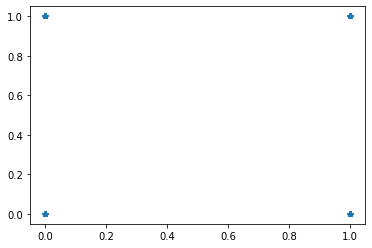

In [105]:
plt.plot(data_sans_nan["ImmoFaz_Scl_51"], data_sans_nan["Logement_prix_m2_20"], '*' )

In [107]:
(data_sans_nan["ImmoFaz_Scl_51"] - data_sans_nan["Logement_prix_m2_20"]).sum()

-381

In [108]:
data_sans_nan.shape[0]

127115